<a href="https://colab.research.google.com/github/Shraddha-Ramteke/Data-Structures-in-python-/blob/main/Lesson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lesson 5 - Graph Algorithms (BFS, DFS & Shortest Paths)**

# Graphs in the Real World

Railway network
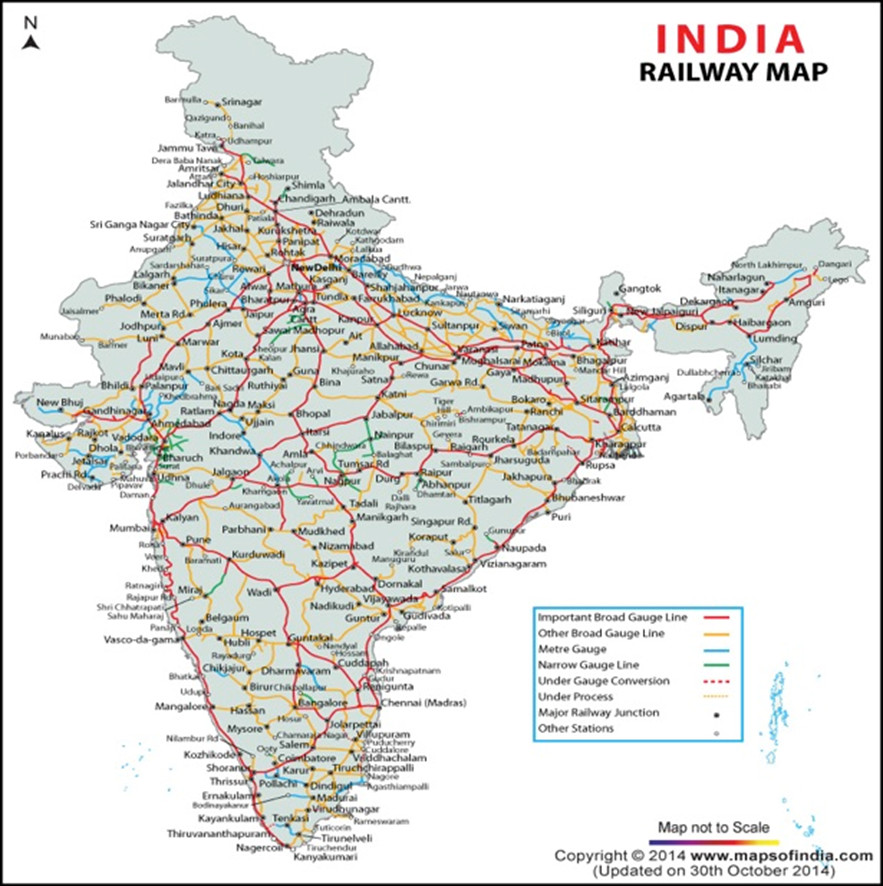

# Shortest Paths
Question: Write a function to find the length of the shortest path between two nodes in a weighted directed graph.

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.
2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.[16]
3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.
4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.
5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.
Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

In [1]:
def update_distances(graph, current, distance, parent=None):
    """Update the distances of the current node's neighbors"""
    neighbors = graph.data[current]
    weights = graph.weight[current]
    for i, node in enumerate(neighbors):
        weight = weights[i]
        if distance[current] + weight < distance[node]:
            distance[node] = distance[current] + weight
            if parent:
                parent[node] = current

def pick_next_node(distance, visited):
    """Pick the next univisited node at the smallest distance"""
    min_distance = float('inf')
    min_node = None
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_distance:
            min_node = node
            min_distance = distance[node]
    return min_node

In [2]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]
num_nodes7, len(edges7)

(6, 7)

# Binary Heap
A data structure to maintain the running minimum/maximum of a set of numbers, supporting efficient addition/removal.

Heap operations:

- Insertion - 
O
(
l
o
g
N
)
- Min/Max - 
O
(
1
)
 (depending on type of heap)
- Deletion - 
O
(
l
o
g
N
)
- Convert a list to a heap - 
O
(
n
)

In [3]:
num_nodes1 = 5
edges1 = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (1, 4), (1, 3)]
num_nodes1, len(edges1)

(5, 7)

In [4]:
num_nodes3 = 9
edges3 = [(0, 1), (0, 3), (1, 2), (2, 3), (4, 5), (4, 6), (5, 6), (7, 8)]
num_nodes3, len(edges3)

(9, 8)

In [5]:
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), 
          (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]

num_nodes5, len(edges5)

(9, 10)

In [6]:
# Directed graph
num_nodes6 = 5
edges6 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]
num_nodes6, len(edges6)

(5, 6)

In [7]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]
num_nodes7, len(edges7)

(6, 7)

# Adjacency List

In [8]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.data = [[] for _ in range(num_nodes)]
        for v1, v2 in edges:
            self.data[v1].append(v2)
            self.data[v2].append(v1)
            
    def __repr__(self):
        return "\n".join(["{} : {}".format(i, neighbors) for (i, neighbors) in enumerate(self.data)])

    def __str__(self):
        return repr(self)

# Breadth First Search
Complexity 
O
(
m
+
n
)

In [10]:
def bfs(graph, source):
    visited = [False] * len(graph.data)
    queue = []
    
    visited[source] = True    
    queue.append(source)
    i = 0
    
    while i < len(queue):
        for v in graph.data[queue[i]]:
            if not visited[v]:
                visited[v] = True
                queue.append(v)
        i += 1
        
    return queue
    bfs(g1, 3)

# Depth First Search

In [ ]:
def dfs(graph, source):
    visited = [False] * len(graph.data)
    stack = [source]
    result = []
    
    while len(stack) > 0:
        current = stack.pop()
        if not visited[current]:
            result.append(current)
            visited[current] = True
            for v in graph.data[current]:
                stack.append(v)
                
    return result

# Directed and Weighted Graph


In [12]:
class Graph:
    def __init__(self, num_nodes, edges, directed=False):
        self.data = [[] for _ in range(num_nodes)]
        self.weight = [[] for _ in range(num_nodes)]
        
        self.directed = directed
        self.weighted = len(edges) > 0 and len(edges[0]) == 3
            
        for e in edges:
            self.data[e[0]].append(e[1])
            if self.weighted:
                self.weight[e[0]].append(e[2])
            
            if not directed:
                self.data[e[1]].append(e[0])
                if self.weighted:
                    self.data[e[1]].append(e[2])
                
    def __repr__(self):
        result = ""
        for i in range(len(self.data)):
            pairs = list(zip(self.data[i], self.weight[i]))
            result += "{}: {}\n".format(i, pairs)
        return result

    def __str__(self):
        return repr(self)